# **PRÁCTICA 2:  Predicción de la radiación solar en plantas fotovoltaicas**
---------
Jose Manuel Flores Emmi y Leire Pantoja Jiménez

## **Introducción**

En el escenario actual de evolución hacia fuentes de energía más sostenibles, las tecnologías de generación eléctrica basadas en fuentes renovables tienen un papel fundamental en el ámbito de energía global. Siguiendo esta línea, la energía solar ha ganado protagonismo como una fuente limpia y abundante de electricidad. Sin embargo, la variabilidad e incertidumbre están siempre presentes debido a la difícil planificación y organización de plantas solares eficientes.

En este contexto, la predicción precisa de la radiación solar diaria se puede definir como una herramienta esencial para las empresas productoras de energía solar. Por lo tanto, este estudio se centra en desarrollar y comparar modelos de regresión en Python para  predecir la radiación solar diaria en una planta solar específica, en concreto, la planta solar de Oklahoma.

A través del análisis de datos y la implementación de algoritmos de regresión, se explorarán métodos de entrenamiento simples y avanzados. Se utilizarán datos meteorológicos del pasado, aprovechando así la metodología del aprendizaje automático para la construcción de modelos predictivos robustos.

Las variables de entrada consisten en las predicciones para el día siguiente de 15 variables meteorológicas. Los datos han sido generados por una simulación de ecuaciones de la atmósfera denominada NWP (Numerical Weather Prediction). Dichas variables han sido generadas para cinco momentos del día siguiente: 12h, 15h, 18h, 21h y 24 UTC. La variable "salida" representa la radiación solar acumulada durante todo el día.

Es necesario resaltar que este proyecto se llevará a cabo como si fuera una competición por lo que, en un primer lugar, se cuenta con un conjunto de 12 años con los que se realizarán varias pruebas para obtener el mejor modelo posible y una vez se tiene ese modelo se obtiene una estimación de lo que se podría obtener en una competición. Por otro lado se tiene otro fichero con los datos pertenecientes a 2 años pero sin la variable respuesta, a estos datos se les aplicará el modelo final para simular los datos que serían enviados a la competición.

Para finalizar, el objetivo concreto del presente documento es ofrecer una solución precisa y práctica a la estimación diaria de radiación solar de la planta de Oklahoma, es decir, este estudio constituye una mejora de la eficiencia operativa de dicha planta solar, contribuyendo así con las energías sostenibles.

In [ ]:
pip install pyarrow

## **Análisis Exploratorio de datos (EDA)**

En primer lugar se realizará un Análisis Exploratorio de los datos en cuestión. Este es un paso de vital importancia en cualquier ámbito en donde se trabaja con una gran cantidad de datos.

Este paso nos permitirá principalmente identificar la diversidad de variables y características disponibles en nuestro conjunto de datos.

Por otra parte, el EDA permitirá tanto identificar la cantidad y el porcentaje de valores faltantes o missing values que poseen las variables para el estudio como definir si es necesario realizar alguna transformación de los tipos de variables con los que se cuentan. Es decir, el EDA es un paso de crucial importancia para definir correctamente el preprocesamiento que se va a utilizar y conocer con profundidad los datos en estudio.

Se procede a cargar todas las librerías juntas de modo que si ocurre algún error proveniente de las mismas, será más fácil identificarlo y resolverlo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importar librerías

import pyarrow.feather as feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import datetime
import warnings

# Especifico la ruta del archivo
ruta_del_archivo = '/content/drive/MyDrive/Práctica 2/disp.feather'

# Leer el archivo
tabla = feather.read_table(ruta_del_archivo)

# Creamos el data frame
df = tabla.to_pandas()

Después de cargar los datos que se utilizarán para el estudio, se procede a visualizar el fichero para verificar que se ha cargado correctamente.

In [ ]:
# Devolvemos el fichero disp
print(df.head())

       salida apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  \
0  12384900.0        low         0.0         0.0    0.000000    0.000000   
1  11908500.0        low         0.0         0.0    0.017273    0.139091   
2  12470700.0        low         0.0         0.0    0.000000    0.000000   
3  12725400.0        low         0.0         0.0    0.000000    0.000000   
4  10894800.0        low         0.0         0.0    0.000000    0.000000   

  dlwrf_s1_1 dlwrf_s2_1  dlwrf_s3_1 dlwrf_s4_1  ... ulwrf_t1_1  ulwrf_t2_1  \
0       None        low  251.901758        low  ...        0.0        high   
1       blue     medium  271.982095     medium  ...        0.0      medium   
2        red        low  217.133093        low  ...        0.0      medium   
3       blue        low  226.493584        low  ...        0.0      medium   
4        red        low  249.123549     medium  ...        0.0      medium   

   ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1 uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  

Exploramos el DataFrame para conocer a profundidad los aspectos más importantes del mismo.

In [ ]:
# Exploramos el data frame
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.describe())

(4380, 76)
Index(['salida', 'apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1',
       'apcp_sf5_1', 'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1',
       'dlwrf_s5_1', 'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1',
       'dswrf_s5_1', 'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1',
       'pres_ms5_1', 'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1',
       'pwat_ea5_1', 'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1',
       'spfh_2m5_1', 'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1',
       'tcdc_ea5_1', 'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1',
       'tcolc_e5_1', 'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1',
       'tmax_2m5_1', 'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1',
       'tmin_2m5_1', 'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1',
       'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1',
       'tmp_sfc5_1', 'ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf

Se puede observar mediante la descripción anterior de los datos que estos cuentan con un total de 4380 instancias y 76 variables, es interesante destacar que es un conjunto de datos de un tamaño considerable. Por otra parte, se pueden identificar los tipos de cada una de las variables, en este caso, se cuenta con variables neméricas y categóricas.

La variable a predecir, en este caso, la variable **"salida"** es una variable numérica de tipo "*float*".

Por último, se pueden observar los estadísticos de mayor relevancia de algunas de las variables numéricas, estos son: la media, el mínimo, el máximo, la desviación típica y los cuartiles de las variables.

In [ ]:
# Separamos las variables explicativas de la variable salida
X = df.drop('salida', axis=1)
y = df["salida"]

Es importante comprobar si existen datos faltantes ya que algunos algoritmos no pueden ejecutarse si el dataset no está completo.

In [ ]:
# Calculamos los missing values
pd.set_option('display.max_rows', 20)
missing_values_count = X.isnull().sum()

# Calculamos el porcentaje de missing values por columna
missing_values_percent = 100*missing_values_count/len(X)

# Creamos un data frame con el número y el porcentaje de missing values
missing_values_X = pd.DataFrame({'count':missing_values_count, 'percent': missing_values_percent})

# Mostramos el DataFrame ordenado por porcentaje de forma descendente
missing_values_X.sort_values('percent', ascending=False)

# Calculamos el número total de columnas con datos faltantes
total_columns_with_missing_data = (missing_values_X['count'] > 0).sum()
print(f'\nNúmero total de columnas con datos faltantes: {total_columns_with_missing_data}')


Número total de columnas con datos faltantes: 19


Se comprueba que 19 columnas tienen datos faltantes y algunas de ellas con porcentajes muy elevados. Más adelante se mostrará como resolver este problema.

Otro factor a tener en cuenta es saber si hay columnas constantes, esto se refiere a columnas cuyos valor es el mismo para todas las instancias. Dichas columnas se podrán eliminar ya que no aportan información y consumen capacidad del ordenador.

In [ ]:
# Verificamos los atributos constantes
constantes = df.nunique() == 1


# Devolvemos las columnas que son constantes
print(constantes[constantes].index)

Index(['pwat_ea3_1', 'spfh_2m3_1', 'tcolc_e3_1', 'tmin_2m2_1', 'tmin_2m4_1',
       'tmp_2m_3_1', 'ulwrf_t1_1', 'uswrf_s1_1'],
      dtype='object')


Se obtiene que hay un total de 8 columnas constantes que serán eliminadas posteriormente. Es importante graficar la variable respuesta para comprobar que se trata de una serie temporal.

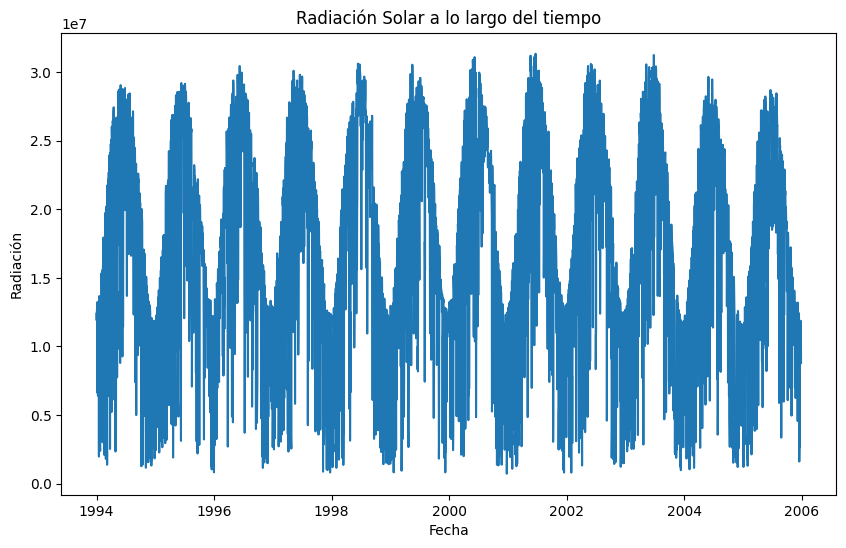

In [ ]:
# Creamos el gráfico de nuestra variable salida ("salida")
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
# crear fecha inicial
fecha_inicial = datetime.date(1994,1,1,)

# Personalizamos nuestro plot
plt.xlabel('Fecha')
plt.ylabel('Radiación')
plt.title('Radiación Solar a lo largo del tiempo')
# Crear la lista de fechas
fechas = pd.date_range(fecha_inicial, periods = 12*365, freq='D')

# Asignar la lista de fechas a una columna
data_fecha = df.assign(Fecha=fechas)

# Crear el gráfico de lineas
plt.plot(data_fecha['Fecha'], data_fecha['salida'])    # faltan cosas creo
# Devolvemos el gráfico
plt.show()

Se puede observar de forma clara en el gráfico de la variable "salida" que se trata de una variable que posee cierta dependencia temporal, parece lógico ya que se trata de la radiación solar acumulada durante todo el día.

En este caso, se cuenta con valores que van desde el año 1994 hasta el año 2006, es decir, 12 años. Se observa que la radiación presenta cierta estacionalidad, lo que es bastante normal ya que en estaciones como primavera y verano es lógico que la radiación solar aumente, a diferencia de estaciones como otoño e invierno que es esperable que la radiación solar disminuya de manera notable. Por lo tanto, esa es la estacionalidad que se ve bastante marcada en el gráfico expuesto.

Es interesante destacar que dicha estacionalidad no es igual en todos los descensos y aumentos  de la radiación, es decir, no siempre aumenta o disminuye en la misma cuantía, lo que también parece ser bastante lógico. Se observa también que los valores oscilan alrededor de una media más o menos constante, se puede afirmar que los valores oscilan alrededor de una media aproximadamente igual a 1,5.

Gracias a lo anteriormente expuesto, que la variable "salida" posea cierta dependencia temporal es un hecho que se debe tener en cuenta cuidadosamente al momento de realizar cualquier tipo de transformación o preprocesamiento de nuestros datos ya que es interesante conservar ese comportamiento peculiar durante los distintos períodos o meses en los que fueron conseguidos y registrados los datos.

## **Preprocesado**





### Métrica $R^2$

El **$R^2$** es una métrica que evalúa la calidad de un modelo de regresión. Se denomina coeficiente de determinación y se calcula de la siguiente manera: R^2 = Variación explicada / Variación total. Indica la proporción de la variación en la variable respuesta que es explicada por el modelo. La métrica **$R^2$** varía en 0 y 1 y cuanto más alto sea el número mejor se ajusta el modelo a los datos. Un inconveniente de esta métrica es que siempre aumenta cuando aumentan el número de predictores, aunque estos no sean relevantes para el modelo, lo que puede producir una falsa sensación de seguridad.

Por ello es más conveniente utilizar el **$R^2$ ajustado** o **score** que se calcula de la siguiente manera:
$R^2_{\text{adj}} = 1 - \frac{(1 - R^2) \cdot (n - 1)}{n - p - 1}$. En este caso n es el número de predictores y p el número de variables. Como se puede ver esta métrica utiliza el R^2 teniendo en cuenta el número de variables predictoras  y así evitar el sobreajuste

La otra métrica que se va a comentar es el **Error Relativo Absoluto (RAE)** cuya función es evaluar la precisión de un modelo en comparación con los valores reales. Mide la diferencia promedio entre las predicciones del modelo y los valores reales, en relación con la variabilidad de los valores reales. Cuanto menor sea el RAE mejor será la capacidad predictiva del modelo.
La fórmula es la siguiente:
$RAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{\sum_{i=1}^{n} |y_i - \bar{y}|}$

Donde:
- $y_i$ son los valores reales.
- $\hat{y}_i$ son los valores predichos por el modelo.
- $\bar{y}$ es la media de los valores reales.
- $n$ es el número total de observaciones.

### ¿Cuál es el mejor método de imputación y de escalado?

En este apartado se compararán varios métodos de imputación y de escalado para determinar cual es la mejor opción.

En primer lugar, se realizará la división de los datos en dos muestras, una muestra de entrenamiento y una muestra de prueba o test, es interesante destacar que en esta oportunidad se hace uso del parámetro "***shuffle***" igual a False ya que nos interesa conservar la dependencia temporal que se comentó en la interpretación del gráfico de la variable , en este caso, la radiación solar durante todo el día.

In [ ]:
# Dividimos los datos en entrenamiento y prueba sin mezclarlos

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=False) #Dividimos en 9 y 3


Al tratarse de una base de datos que cuenta con una elevada cantidad de variables, el primer paso a seguir es la generación de una lista en donde se permitirá diferenciar de manera más sencilla las variables de tipo numéricas de las variables no numéricas, en este caso, categóricas.

En este caso, se define una función en donde se extraen las columnas de las variables que son del tipo especificado "tipos". Por otra parte, se define una segunda función "no_tipos" por la cual se extraen las variables que son del tipo NO especificado.

In [ ]:
# Obtenemos la lista de predictores numéricos y no numéricos

def tipos(X, tipo):
  columns = [col for col in X.columns if X[col].dtype == tipo]
  return columns

def no_tipos(X, tipo):
  columns = [col for col in X.columns if X[col].dtype != tipo]
  return columns

nm = tipos(df, 'float64')
nm.remove('salida')
print(len(nm))
print(nm)

cc = no_tipos(df, 'float64')
print(len(cc))
print(cc)

45
['apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1', 'dlwrf_s3_1', 'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1', 'tcdc_ea1_1', 'tcdc_ea2_1', 'tcolc_e1_1', 'tcolc_e3_1', 'tcolc_e5_1', 'tmax_2m5_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc3_1', 'tmp_sfc5_1', 'ulwrf_s2_1', 'ulwrf_s4_1', 'ulwrf_s5_1', 'ulwrf_t1_1', 'ulwrf_t5_1', 'uswrf_s1_1', 'uswrf_s3_1', 'uswrf_s4_1', 'uswrf_s5_1']
30
['apcp_sf1_1', 'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s4_1', 'dlwrf_s5_1', 'dswrf_s4_1', 'dswrf_s5_1', 'pres_ms5_1', 'pwat_ea1_1', 'pwat_ea5_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1', 'tcolc_e2_1', 'tcolc_e4_1', 'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmin_2m1_1', 'tmp_2m_1_1', 'tmp_2m_4_1', 'tmp_sfc2_1', 'tmp_sfc4_1', 'ulwrf_s1_1', 'ulwrf_s3_1'

Luego de aplicar las funciones creadas especificando "*float64*" como tipo de variable en ambas, se obtienen dos listas de variables:

* **nm**: Lista que contiene las variables numéricas, en este caso, un total de 45 variables.

* **cc**: Lista que contiene las variables no numéricas, en este caso, un total de 30 variables.

Es decir, las 75 variables predictoras que se utilizarán en el estudio se encuentran en sus respectivas listas según su tipo, lo que optimiza en gran cantidad el tiempo de trabajo y la organización del mismo, especialmente durante el preprocesamiento de los datos.



Es interesante destacar antes de iniciar con el preprocesamiento de los datos que este se realizará mediante una pipeline ya que uno de los principales objetivos de la práctica es automatizar y simplificar el proceso de aprendizaje automático.

Las pipelines permiten, evitar errores, data leakage o pérdida de información y ahorrar tiempo.

El primer paso para la creación de la pipeline anteriormente mencionada es crear una función que permita eliminar las columnas o variables que posean un elevado porcentaje de valores faltantes, en este caso, 80% o más de valores faltantes.

In [ ]:
# Creamos una función para borrar las columnas que tengan más del 80% de datos faltantes.

def borrar_col_na (numeros, threshold=0.8):

  #Contamos los valores nulos por columnas
  suma_nulos = np.sum (np.isnan(numeros), axis=0)

  # Calculamos el porcentaje de missing values por columna
  porcentaje_nulos = np.divide(suma_nulos, numeros.shape [0])

  # Obtenemos las columnas que superan el umbral
  drop_columns = np.where (porcentaje_nulos > threshold) [0]

  # Eliminamos las columnas del array
  numeros = np.delete (numeros, drop_columns, axis=1)

  # Devolvemos el array modificado
  return numeros

# Creamos un objeto FunctionTransformer con la función definida
Borrar_NAs = FunctionTransformer(borrar_col_na)

Una vez creada la función que permitirá eliminar las variables identificadas mediante el EDA que poseen un gran porcentaje de missing values, se procede a iniciar con la construcción de la pipeline, se destaca que la función creada anteriormente se introducirá en el pipeline para posteriormente aplicarlo sobre las variables de tipo numéricas.

Esto se realizará de esta manera ya que preprocesos de datos como por ejemplo, eliminación de atributos constantes o eliminación de columnas con un alto porcentaje de missing values no implican **information leakage** o pérdida de información.

Por lo tanto, este tipo de pasos pueden realizarse tanto dentro como fuera de la pipeline, en este caso, ambos pasos del preprocesamiento se realizarán dentro de la pipeline por motivos de sencillez y reproducibilidad del código, es decir, una vez creada la pipeline se puede aplicar a cualquier conjunto de datos durante la realización del estudio, además, de esta forma se genera un código más compacto y sencillo de analizar.

Ahora se procede a construir una pipeline para determinar cuál es el mejor método de imputación y escalado, entrenando y evaluando un modelo con KNN.

En primer lugar, se pretende estudiar cuál es el mejor método de preprocesamiento para las variables numéricas. En cuanto a la imputación se comprobará si es mejor imputar con la mediana utilizando la función **SimpleImputer** o mediante un KNN de regresión utilizando la función **IterativeImputer**. Además, para las variables numéricas se utilizará la función creada previamente para borrar las columnas con un porcentaje igual o mayor al 80% de missing values. En la misma línea, en la pipeline para las variables numéricas se incluye la función **StandardScaler** para realizar la estandarización de las mismas.

Por otra parte, para las variables categóricas se realiza el mismo procedimiento para la imputación, es decir, se utiliza **SimpleImputer** pero imputando con la moda y se utiliza la función **IterativeImputer** para imputar mediante un KNN de clasificación. También se introduce la función **OneHotEncoder** con la finalidad de codificar las variables categóricas.

Además, para ambos tipos de variables se ha introducido en sus respectivas pipelines la función **VarianceThreshold** para eliminar las columnas constantes ya que la varianza de una constante es igual a 0, criterio que sigue dicha función.

Finalmente, se concatenan las dos pipelines creadas con anterioridad dentro del **preprocessor** y además se le asigna el tipo de variable que debe transformar cada una de las pipelines que conforman dicho preprocessor.



In [ ]:
imputer_learner_reg = KNeighborsRegressor()
num_transformers = {
    ("imputer_col", SimpleImputer(strategy="median")),
    ("imputer_row", IterativeImputer(estimator=imputer_learner_reg))
}

num_imputer = FeatureUnion(transformer_list=num_transformers)

# Creamos el pipeline de preproceso numérico
num_pipeline = Pipeline([
    ("borrar_constantes", VarianceThreshold(0)),
    ('borrar_NAs', Borrar_NAs),
    ('imputer', IterativeImputer(estimator=imputer_learner_reg)),
    ('scaler', StandardScaler())
])

imputer_learner_class = KNeighborsClassifier()
cat_transformers = {
    ("imputer_col", SimpleImputer(strategy="mode")),
    ("imputer_row", IterativeImputer(estimator=imputer_learner_class))
}

cat_imputer = FeatureUnion(transformer_list = imputer_learner_class )

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output = False, handle_unknown="ignore")),
    ('borrar_constantes', VarianceThreshold(0)),
    ('imputer', IterativeImputer(estimator=imputer_learner_class))

])

# Creamos pipeline numérico y categórico
preprocessor = ColumnTransformer([
    ("num", num_pipeline, nm),
    ("cat", cat_pipeline, cc)
])

preprocessor.fit(x_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('borrar_constantes',
                                                  VarianceThreshold(threshold=0)),
                                                 ('borrar_NAs',
                                                  FunctionTransformer(func=<function borrar_col_na at 0x7ce250bc5cf0>)),
                                                 ('imputer',
                                                  IterativeImputer(estimator=KNeighborsRegressor())),
                                                 ('scaler', StandardScaler())]),
                                 ['apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1',
                                  'apcp_sf5_1', 'dlwrf_s3_1', 'ds...
                                  'dlwrf_s4_1', 'dlwrf_s5_1', 'dswrf_s4_1',
                                  'dswrf_s5_1', 'pres_ms5_1', 'pwat_ea1_1',
                                  'pwat_ea5_1', 'tcdc_ea3_1', 'tcdc_ea4_1',
                                  'tcdc_ea5_1', 'tcolc_e2_1', 'tcolc_e4_1',
                                  'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1',
                                  'tmax_2m4_1', 'tmin_2m1_1', 'tmp_2m_1_1',
                                  'tmp_2m_4_1', 'tmp_sfc2_1', 'tmp_sfc4_1',
                                  'ulwrf_s1_1', 'ulwrf_s3_1', 'ulwrf_t2_1',
                                  'ulwrf_t3_1', 'ulwrf_t4_1', 'uswrf_s2_1'])])

Finalmente se fusiona la pipeline creada en el apartado anterior con un modelo creado con un algoritmo KNN de regresión para obtener cual es la mejor combinación para realizar el preprocesamiento de los datos.

In [ ]:
regressor = KNeighborsRegressor()
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", regressor)
])

pipeline.fit(x_train, y_train) # Ajustamos la pipeline con los datos de entrenamiento

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('borrar_constantes',
                                                                   VarianceThreshold(threshold=0)),
                                                                  ('borrar_NAs',
                                                                   FunctionTransformer(func=<function borrar_col_na at 0x7ce250bc5cf0>)),
                                                                  ('imputer',
                                                                   IterativeImputer(estimator=KNeighborsRegressor())),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['apcp_sf2_1', 'apcp_sf3_1',
                                                   'apcp_sf4_...
                                                   'dswrf_s5_1', 'pres_ms5_1',
                                                   'pwat_ea1_1', 'pwat_ea5_1',
                                                   'tcdc_ea3_1', 'tcdc_ea4_1',
                                                   'tcdc_ea5_1', 'tcolc_e2_1',
                                                   'tcolc_e4_1', 'tmax_2m1_1',
                                                   'tmax_2m2_1', 'tmax_2m3_1',
                                                   'tmax_2m4_1', 'tmin_2m1_1',
                                                   'tmp_2m_1_1', 'tmp_2m_4_1',
                                                   'tmp_sfc2_1', 'tmp_sfc4_1',
                                                   'ulwrf_s1_1', 'ulwrf_s3_1',
                                                   'ulwrf_t2_1', 'ulwrf_t3_1',
                                                   'ulwrf_t4_1',
                                                   'uswrf_s2_1'])])),
                ('regressor', KNeighborsRegressor())])

Una vez finalizada la creación de la pipeline, se procede a definir un **param_grid** en donde se encuentran todas las distintas opciones para realizar el preprocesamiento.

En primer lugar, se encuentran las opciones de imputación para las variables numéricas que son un KNN de regresión e imputación con la media mediante SimpleImputer. Por otra parte, las distintas formas de estandarizar los datos que son **StandardScaler**, **RobustScaler** y **MaxAbsScaler**. Por último, se observa las dos opciones para imputar los datos categóricos faltantes, es decir, imputar con un KNN de clasificación e imputar con la moda.

Posteriormente, el diccionario de opciones expuesto se evalúa mediante un GridSearch para encontrar la mejor combinación.

In [ ]:
# Definimos parámetros para los imputadores
from sklearn.metrics import r2_score
import time
warnings.filterwarnings('ignore')

param_grid = {
    'preprocessor__num__imputer':[IterativeImputer(estimator=  KNeighborsRegressor),SimpleImputer(strategy = 'mean')],
    'preprocessor__num__scaler': [StandardScaler(), RobustScaler(), MaxAbsScaler()],
    'preprocessor__cat__imputer': [IterativeImputer(estimator = KNeighborsClassifier), SimpleImputer(strategy = 'most_frequent')],
}

# Creamos una función para evitar repetir código

def evaluar_grid(param_grid, pipeline, x_train, y_train, x_test, y_test):
    # Crear un objeto GridSearchCV con el espacio de búsqueda, el estimador, la validación cruzada y la métrica de evaluación
    tscv = TimeSeriesSplit(n_splits=3)
    grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='r2')

    # Medimos tiempo de inicio
    start_time = time.time()

    # Entrenamos con los datos de entrenamieto
    grid_search.fit(x_train, y_train)

    # Medimos tiempo de fin
    end_time = time.time()

    # Medimos la duración total
    duracion = end_time - start_time

    # Imprimir los mejores hiperparámetros
    print('Los mejores hiperparámetros del modelo son los siguientes:', grid_search.best_params_)

    # Obtener el score del mejor modelo
    score = grid_search.best_score_
    print('El score del mejor modelo sobre los datos de entrenamiento es:', score)

    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_

    # Predecir el conjunto de prueba con el mejor modelo
    y_pred = best_model.predict(x_test)

    # Calcular el r2 para el mejor modelo sobre los datos de prueba
    r2_value = r2_score(y_test, y_pred)
    print('El r2 para el mejor modelo sobre los datos de test es:', r2_value)
    print('La duración medida en segundos es:', duracion)

evaluar_grid(param_grid, pipeline, x_train, y_train, x_test, y_test)


Los mejores hiperparámetros del modelo son los siguientes: {'preprocessor__cat__imputer': SimpleImputer(strategy='most_frequent'), 'preprocessor__num__imputer': SimpleImputer(), 'preprocessor__num__scaler': StandardScaler()}
El score del mejor modelo sobre los datos de entrenamiento es: 0.7875301703656349
El r2 para el mejor modelo sobre los datos de test es: 0.7454775886062168
La duración medida en segundos es: 2.267087459564209


Se observa que la mejor combinación de pasos para realizar un preprocesamiento que maximice el rendimiento del modelo es realizar la imputación categórica con la moda, la imputación numérica con la media y por último realizar la estandarización de los datos numéricos mediante la función StandardScaler.

El resultado de la evaluación con el coeficiente $R^2$ del modelo KNN sobre los datos de test es 0.7454.

También se observa que el tiempo de procesamiento medido en segundos en este caso es de 2,26 segundos aproximadamente.



## **Comparación no ensembles sin ajuste de hiperparámetros**


En este apartado se compararán distintos métodos no ensembles sin ajuste de hiperparámetros. En el contexto del aprendizaje automático un método ensamble es aquel que solo utiliza un modelo para hacer predicciones. Son métodos que se centran en crear, entrenar y evaluar un solo modelo de manera efectiva. Los tres métodos que se utilizarán serán **KNN**, **árbol** y **SVM** **lineal** y **radial**. A continuación se hace una pequeña descripcición de cada uno:

- **KNN:** su principal objetivo es asignar una etiqueta de clase a un punto de datos desconocido basándose en la mayoría de las etiquetas de clase de los puntos de datos vecinos más cercanos en un conjunto de datos de entrenamiento.Para ello primero calcula la distancia entre el item a clasificar y el resto de items del conjunto de datos de entrenamiento, luego selecciona los "k" elementos más cercanos y de esos elementos se ve cuales conforman una mayoría de clase para poder clasificar una nuevo dato.


- **Árbol de decisión:** modelos que toman decisiones basadas en una serie de preguntas sobre las características de los datos. Cada nodo del árbol representa una pregunta, y cada rama representa una respuesta a esa pregunta. El árbol se divide en base a las características que mejor separan las clases o reducen la variabilidad.

- **SVM:** la idea principal es encontrar un hiperplano en un espacio de características que mejor se ajuste a los datos de manera que se minimice la diferencia entre las predicciones y los valores reales. La principal diferencia entre los SVM lineal y SVM con kernel gaussiano se encuentra en como los modelos se ajustan a la relación entre las variables. El **SVM Lineal** busca un hiperplano lineal y el **SVM Radial** transforma los datos en un espacio de características de mayor dimensión mediante una función de kernel radial, lo que permite modelar relaciones no lineales entre las variables predictoras y la variable respuesta.

In [ ]:
regressor = KNeighborsRegressor()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

In [ ]:
# Entrenar y evaluar el mejor método entre los no ensambles
param_grid = {
    'regressor': [KNeighborsRegressor(), DecisionTreeRegressor(), SVR(kernel = 'linear'), SVR(kernel = 'rbf')]
}


evaluar_grid(param_grid, pipeline, x_train, y_train, x_test, y_test)



Los mejores hiperparámetros del modelo son los siguientes: {'regressor': KNeighborsRegressor()}
El score del mejor modelo sobre los datos de entrenamiento es: 0.7881002805257419
El r2 para el mejor modelo sobre los datos de test es: 0.7500853881453912
La duración medida en segundos es: 18.31658172607422


En este caso se puede observar con claridad que el mejor modelo ensemble sin ajuste de hiperparámetros resulta ser un KNN.

El resultado de la evaluación con el coeficiente $R^2$ del modelo KNN sobre los datos de test es 0.75.

También se observa que el tiempo de procesamiento medido en segundos en este caso es de 18.31 segundos aproximadamente.



## **Comparación no ensembles con ajuste de hiperparámetros**

En este apartado se realizará la misma tarea pero ahora ajustando los hiperparámetros de los modelos mediante un Grid Search, que es una búsqueda en rejilla que prueba todas las posibles combinaciones de valores de los hiperparámetros. Los hiperparámetros a ajustar son los siguientes:
- **KNN:** el hiperparámetro ***k*** representa la cantidad de vecinos que se tomarán en cuenta para hacer predicciones.

- **Árbol de decisión:** se ajustarán dos hiperparámetros distintos, ***max_depth*** que limita la profundidad máxima del árbol y ***min_samples_split*** que especifica el número mínimo de muestras requeridas para dividir un nodo.

- **SVM:** para la parte lineal se ajustará el hiperparámetro ***C*** que controla la penalización por errores y complejidad del modelo. Si ***C*** es grande se le da mucha importancia a que todos los datos de entrenamiento se ajusten correctamente y si ***C*** es pequeño al revés. En la parte Radial se ajustará también ***C*** y ***gamma*** que controla la influencia de un solo ejemplo de entrenamiento y la flexibilidad del modelo.

In [ ]:
# Definir los posibles valores de los hiperparámetros a explorar con una busquea en cuadrícula

param_grid = [{
    'regressor':[KNeighborsRegressor()], # opción para el estimador
    'regressor__n_neighbors':[3,5,7],  # opciones para el nº de vecinos

},
{
    'regressor':[DecisionTreeRegressor()], # opción para el estimador
    'regressor__max_depth':[2,4,6,10],
    'regressor__min_samples_split':[100,50,10]
},
{
    'regressor':[SVR(kernel='linear')],
    'regressor__C':[0.0,1,10,100],
},
{
    'regressor':[SVR(kernel='rbf')],
    "regressor__C": [0.01, 0.1, 1, 10, 100],
    "regressor__gamma": ["scale", "auto", 0.0001, 0.1, 1, 10]
}]

evaluar_grid(param_grid, pipeline, x_train, y_train, x_test, y_test)

Los mejores hiperparámetros del modelo son los siguientes: {'regressor': KNeighborsRegressor(n_neighbors=7), 'regressor__n_neighbors': 7}
El score del mejor modelo sobre los datos de entrenamiento es: 0.7953041773184562
El r2 para el mejor modelo sobre los datos de test es: 0.762910409245679
La duración medida en segundos es: 225.29648613929749


En este caso se observa que para los modelos no ensembles con ajuste de hiperparámetros el modelo que mejor resulta es el KNN con un número total de vecinos igual a 7.

Por otra parte, se observa que el coeficiente $ R^2 $ para la muestra test es igual a 0.7629, o sea, 76.29% lo que supone un incremento con respecto al caso anterior en el que no se ajustaban hiperparámetros.

Por último, el tiempo de procesamiento es de 225 segundos que son aproximadamente 3 minutos y 46 segundos. Es decir, el tiempo aumenta considerablemente con respecto al caso anterior.

## **Comparación ensambles sin ajuste de hiperparámetros**

Los métodos ensemble se refieren a técnicas que combinan las predicciones de múltiples modelos para mejorar el rendimiento del modelo final. Así consiguen no depender de un solo modelo y consiguen resultados más fiables y robustos.  Existen dos tipos de métodos ensamble: bagging y boosting.

- **Bagging**: se construyen múltiples modelos independientes utilizando conjuntos de entrenamiento generados mediante el muestreo bootstrap ( que consiste en tomar muestras con reemplazo de un conjunto de datos). Los modelos se entrenan de forma independiente y las predicciones finales se obtienen haciendo la media de cada predicción individual. El modelo ***Random Forest*** es uno de los más conocidos que utilizan Bagging.

- **Boosting**: los modelos se construyen de manera secuencial de manera que cada modelo nuevo se centra en mejorar y corregir los errores del anterior. La predicción final es una combinación ponderada de todos los modelos anteriores. ***Gradient Boosting*** es uno de los métodos más conocidos que lo utilizan

El método **Random Forest** construye múltiples árboles de decisión con distintas muestras de entrenamiento aleatorias y distintas. Cada árbol se entrena de forma independiente y la predicción final es el promedio de las predicciones de cada árbol. Es un método muy robusto frente al sobreajuste por la combinación de árboles.

El método **Gradient Boosting** utiliza un proceso secuencial para la construcción de los árboles, se crea uno inicial y los posteriores se centran en corregir los errores de los anteriores. Es un método muy potente a la hora de modelar relaciones complejas e incluye técnicas de regularización para evitar el sobreajuste que es una de sus principales desventajas.

Es interesante destacar que en el caso de los modelos RandomForest se introduce la instrucción "random_state=42" ya que en este caso se trabaja con los predictores que se encuentran en las columnas de la base de datos y no se pierda la temporalidad a diferencia de cuando se trabaja con las instancias que si se introduce aleatoriedad, se llega a perder la temporalidad.



In [ ]:
regressor = KNeighborsRegressor()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'regressor': [RandomForestRegressor(random_state = 42), XGBRegressor(random_state = 42)]  # poner porque ahora se pone el random state
}

best_model = None
def ensamble_modelos(param_grid, pipeline, x_train, y_train, x_test, y_test):
    # Crear un objeto GridSearchCV con el espacio de búsqueda, el estimador, la validación cruzada y la métrica de evaluación
    tscv = TimeSeriesSplit(n_splits=3)
    random_search = RandomizedSearchCV(pipeline, param_grid, cv = tscv, n_iter=10, scoring = 'r2')

    # Medimos tiempo de inicio
    start_time = time.time()

    # Ajustar el modelo a los datos de entrenamiento
    random_search.fit(x_train, y_train)

    # Medimos tiempo de fin
    end_time = time.time()

    # Medimos la duración total
    duracion = end_time - start_time

    # Imprimir los mejores hiperparámetros
    print('Los mejores hiperparámetros del modelo son los siguientes:', random_search.best_params_)

    # Obtener el score del mejor modelo
    score = random_search.best_score_
    print('El score del mejor modelo sobre los datos de entrenamiento es:', score)
    global best_model


    # Obtener el mejor modelo
    best_model = random_search.best_estimator_

    # Predecir el conjunto de prueba con el mejor modelo
    y_pred = best_model.predict(x_test)

    # Calcular el r2 para el mejor modelo sobre los datos de prueba
    r2_value = r2_score(y_test, y_pred)
    print('El r2 para el mejor modelo sobre los datos de test es:', r2_value)
    print('La duración medida en segundos es:', duracion)



ensamble_modelos(param_grid, pipeline, x_train, y_train, x_test, y_test)


Los mejores hiperparámetros del modelo son los siguientes: {'regressor': RandomForestRegressor(random_state=42)}
El score del mejor modelo sobre los datos de entrenamiento es: 0.8246200337009025
El r2 para el mejor modelo sobre los datos de test es: 0.8139255674383261
La duración medida en segundos es: 45.28426241874695


En este caso se observa que para los modelos ensembles sin ajuste de hiperparámetros el modelo que mejor resulta es un RandomForest.

Por otra parte, se observa que el coeficiente $ R^2 $ para la muestra test es igual a 0.8139, o sea, 81.39%.

Por último, el tiempo de procesamiento es de 44.9 segundos aproximadamente.

## **Comparación ensambles con ajuste de hiperparámetros.**

Los hiperparámetros que se van a evaluar son los siguientes:

- **Random Forest:** el primero es  el ***Número de árboles*** o ***num_trees*** que representa la cantidad de árboles de decisión que se van a construir. Un número alto mejorará la precisión del modelo pero también hará que el coste computacional sea mayor. El otro hiperparámetro es el ***Número Máximo de Características*** consideradas o ***mtry*** que indica el número máximos de características a considerar para cada división de nodo. Un valor menor controlará la diversidad y el sobreajuste y uno mayor hará que los árboles sean más similares entre sí.

- **Gradient Boosting:** el primero es el ***Número de rondas*** o ***nrounds*** que indica la cantidad de árboles que se van a construir. Un valor más alto construye un conjunto de árboles más complejo pero aumentando el sobreajuste y el coste computacional. El otro hiperparámetro es la ***Tasa de Aprendizaje*** o ***Shrinkage/Eta*** que controla la contribución de cada árbol al modelo final. Si la tasa es baja significa que cada árbol tiene una influencia menor y se requieren más. Si se reduce la tasa se puede mejorar la generalización del modelo pero se deberá aumentar el número de árboles construidos.



In [ ]:
param_grid = [
    {
        "regressor": [RandomForestRegressor(random_state = 42)],
        "regressor__n_estimators": [10, 50, 100, 200],
        "regressor__max_features": [0.5, "sqrt", "log2"]

    },
    {
        "regressor": [XGBRegressor(random_state=42)],
        "regressor__n_estimators": [10, 50, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2, 0.3]
    }
]

ensamble_modelos(param_grid, pipeline, x_train, y_train, x_test, y_test)

Los mejores hiperparámetros del modelo son los siguientes: {'regressor__n_estimators': 100, 'regressor__max_features': 'log2', 'regressor': RandomForestRegressor(max_features='log2', random_state=42)}
El score del mejor modelo sobre los datos de entrenamiento es: 0.82953439733827
El r2 para el mejor modelo sobre los datos de test es: 0.8214833664779111
La duración medida en segundos es: 77.11188912391663


En este caso se observa que para los modelos ensembles con ajuste de hiperparámetros el modelo que mejor resulta es el RandomForest con 100 árboles y el número máximo de predictores es el logaritmo en base dos del total.

Por otra parte, se observa que el coeficiente $ R^2 $ para la muestra test es igual a 0.8214, o sea, 82.14% lo que supone un incremento con respecto al caso anterior en el que no se ajustaban hiperparámetros.

Por último, el tiempo de procesamiento es de 77 segundos, lo que equivale a 1 minuto con 16 segundos. Se destaca que en este caso también hay un aumento en el tiempo con respecto al caso anterior.

## **Entrenamiento del modelo final**

Una vez entrenados todos los modelos se obtiene que el mejor de ellos en cuanto a su rendimiento es el RandomForest con ajuste de hiperparámetros que obtiene un $ R^2 $ de 0.82 por lo que se procede a entrenar este modelo final con todos los datos de los que se dispone.


In [ ]:
# Entrenar el modelo con todos los datos

from joblib import dump

# Aplicar las mismas transformaciones de preprocesamiento
x_transformed = best_model[:-1].transform(X)
# Ajustar el mejor modelo con el conjunto de datos completo
best_model[-1].fit(x_transformed,y)

# Guardar el modelo entrenado en un archivo
dump(best_model, '/content/drive/MyDrive/Práctica 2/modelo.joblib') # Guardar el pipeline con el mejor modelo en un archivo joblib

['/content/drive/MyDrive/Práctica 2/modelo.joblib']

## **Cargar y analizar el fichero para realizar predicciones**

En este apartado se procede a cargar los datos denominados "compet" que son datos de los cuales no se conoce la variable respuesta. Esto se realiza para posteriormente realizar las predicciones a partir de ellos con el mejor modelo seleccionado, en este caso, el RandomForest con ajuste de hiperparámetros.

In [ ]:
# Subir "corp" para predicciones

uploaded = files.upload()

for fn in uploaded.keys():
  print('User')

In [ ]:
# Especifico la ruta del archivo
ruta_del_archivo = '/content/drive/MyDrive/Práctica 2/compet.feather'

# Leer el archivo
tabla = feather.read_table(ruta_del_archivo)

# Creamos el data frame
df_comp = tabla.to_pandas()

In [ ]:
pred_comp = best_model.predict(df_comp)

#Guardar las predicciones en un archivo
# Creamos un dataframe con las predicciones

df_comp2 = pd.DataFrame(pred_comp, columns=["Pred_comp"])

#Guardamos el dataframe en un archivo csv
df_comp2.to_csv("/content/drive/MyDrive/Práctica 2/predicciones_comp.csv", index=False)

## **Investigación Adicional: Hyperband**

En el ámbito del aprendizaje automático existe la desafiante tarea de ajustar los hiperparámetros correctos para los distintos modelos que se pueden construir.

Sin embargo, seleccionar hiperparámetros de manera precisa no es una tarea sencilla y ahora expondremos una manera diferente a la tradicional que permite hacerlo de manera más óptima.

Hyperband es un método de ajuste de hiperparámetros que se basa en la optimización de recursos para encontrar la mejor configuración de hiperparámetros en un conjunto dado. A diferencia de enfoques estudiados con anterioridad como el GridSearchCV o el RandomSearch, **Hyperband** es una estrategia eficiente para la optimización de hiperparámetros que combina la exploración aleatoria con la asignación adaptativa de recursos, lo que permite extraer combinaciones de hiperparámetros que permita obtener un modelo con un alto rendimiento de manera mas eficiente que los enfoques tradicionales de búsqueda exhaustiva.

Los pasos que sigue el proceso son los siguientes:

* 1- **Configuración de Recursos:** Hyperband trabaja con un presupuesto fijo de recursos de entrenamiento, que se distribuye entre múltiples configuraciones de hiperparámetros.

* 2- **División de Configuraciones:** Se dividen las configuraciones en diferentes grupos, llamados "bandas", de manera que casa grupo contiene un número diferente de configuraciones. Las configuraciones en bandas más altas son evaluadas con más recursos.

* 3- **Configuraciones Aleatorias:** Se realiza una búsqueda aleatoria para entrenar y evaluar un modelo con la configuración de hiperparámetros asignada a cada banda. Los modelos se entrenan hasta alcanzar el límite de recursos asignados.

* 4- **Eliminación de peores configuraciones:** Después de cada iteración, se descartan las configuraciones menos prometedoras. Esto asegura que los recursos se centren en las configuraciones más comprometedoras.

* 5- **Iteraciones Múltiples:** El proceso se repite en varias iteraciones, cada vez asignando más recursos a las configuraciones más prometedoras descubiertas en iteraciones anteriores.

Por lo tanto, una de las ventajas principales del Hyperband es que se enfoca principalmente en las configuraciones más prometedoras y descarta rápidamente las menos prometedoras, es decir, es un método que lleva al uso eficiente del tiempo y los recursos.

En primer lugar, se define la función de pérdida para maximizar el coeficiente de determinación $R^2$. Luego, se crea una función que crea y entrena un modelo de regresión, después calcula la función de pérdida en el conjunto de datos de prueba.

Una vez hecho eso se puede iniciar el ajuste de hiperparámetros utilizando el algoritmo Hyperband hasta obtener la mejor combinación y por lo tanto el modelo con el mejor rendimiento.

En este caso no se ha podido completar el proceso debido a que se rompe la ejecución del algoritmo devolviendo un error que hace referencia a que los
"trials" no se pueden completar. Esto se puede deber a que el preprocesamiento de los datos no sea el adecuado ya que contiene un método de imputación basado en un modelo KNN de regresión mediante un IterativeImputer.


In [ ]:
# Definir la función de pérdida como el error de clasificación
def loss_function(model, X, y):
  y_pred = model.predict(X)
  return r2_score(y, y_pred)

In [ ]:
# Importar las librerías necesarias para Hyperband
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install ray
!pip install -U tensorboardx
!pip install -U ray[tune]
from ray import ray,tune

ray.tune.tune

<module 'ray.tune.tune' from '/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py'>

In [ ]:
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.fit_transform(x_test)


# Primero, se define la función que entrena y evalúa el modelo
def train_knn(config):
  # Crear y entrenar el modelo con el número de vecinos dado
  model = KNeighborsRegressor(n_neighbors=config["n_neighbors"], n_jobs=-1)
  model.fit(x_train_preprocessed, y_train)
  # Calcular la pérdida en el conjunto de prueba
  loss = loss_function(model, x_test_preprocessed, y_test)
  # Crear un diccionario con la función de pérdida como valor y una clave arbitraria
  metrics = {"loss": loss}
  # Reportar la pérdida a Ray Tune
  # tune.report(loss=loss)
  ray.train.report(metrics)

# Definir el espacio de búsqueda para el número de vecinos
search_space = {
  "n_neighbors": tune.randint(5, 26)
}

# Iniciar el ajuste de hiperparámetros con Ray Tune y el algoritmo Hyperband
analysis = tune.run(
  train_knn, # La función que entrena y evalúa el modelo
  config=search_space, # El espacio de búsqueda
  metric="loss", # La métrica a optimizar
  mode="min", # El modo de optimización (minimizar o maximizar)
  scheduler=tune.schedulers.HyperBandScheduler() # El planificador que implementa Hyperband
)

# Obtener el mejor resultado
best_trial = analysis.get_best_trial(metric="loss", mode="min")
best_config = best_trial.config
best_loss = best_trial.last_result["loss"]

# Mostrar el mejor resultado
print(f"El mejor modelo encontrado tiene una pérdida de {best_loss:.4f} y usa {best_config['n_neighbors']} vecinos.")

2023-12-12 18:15:57,277	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+------------------------------------------------------------------+
| Configuration for experiment     train_knn_2023-12-12_18-15-57   |
+------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator           |
| Scheduler                        HyperBandScheduler              |
| Number of trials                 1                               |
+------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_knn_2023-12-12_18-15-57
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/train_knn_2023-12-12_18-15-57`

Trial status: 1 PENDING
Current time: 2023-12-12 18:15:57. Total running time: 0s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+--------------------------------------------------+
| Trial name              status       n_neighbors |
+--------------------------------------------------+
| train_knn_7ef4e_00000   PENDING

2023-12-12 18:16:01,007	ERROR tune_controller.py:1383 -- Trial task failed for trial train_knn_7ef4e_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 24, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2563, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(ValueError): ray::ImplicitFunc.train() (pid=46946, ip=172.28.0.12, actor_id=6c414cab814d1fe92c2dad7201000000, repr=train_knn)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_cause(skip


Trial train_knn_7ef4e_00000 errored after 0 iterations at 2023-12-12 18:16:01. Total running time: 3s
Error file: /root/ray_results/train_knn_2023-12-12_18-15-57/train_knn_7ef4e_00000_0_n_neighbors=20_2023-12-12_18-15-57/error.txt

Trial status: 1 ERROR
Current time: 2023-12-12 18:16:01. Total running time: 3s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+--------------------------------------------------+
| Trial name              status       n_neighbors |
+--------------------------------------------------+
| train_knn_7ef4e_00000   ERROR                 20 |
+--------------------------------------------------+

Number of errored trials: 1
+-------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                # failures   error file                                                                                                           |
+---------------------------

TuneError: ignored

## **Conclusiones**

El objetivo principal del presente trabajo era predecir la radiación solar diaria en una planta solar de Oklahoma a partir de predicciones de variables meteorológicas del día anterior. Para llevar a cabo dichas predicciones se han puesto en práctica diversos métodos para construir modelos de regresión y extraer el modelo con el máximo rendimiento.

En primer lugar se ha determinado cual es el mejor método de imputación y de escalado, entrenando y evaluando con un modelo KNN, esto nos ha hecho llegar a la conclusión de que el mejor método de imputación de variables numéricas es imputar con la media y para las variables categóricas es la moda. Por otra parte, se estandariza restando la media de cada variable y dividiendo por la desviación estándar.

Una vez preprocesados los datos se han ajustado distintos modelos con y sin hiperparámetros para comparar sus rendimientos. En el caso de los métodos no ensambles se concluye que se maximiza el rendimiento de los modelos ajustando hiperparámetros, ocurre de la misma forma en el caso de los métodos ensambles, es decir, el rendimiento del modelo aumenta cuando se realiza ajuste de hiperparámetros.

Profundizando en esto, podemos especificar que el mejor modelo extraído de los no ensamble ajustando hiperparámetros es un KNN con 7 vecinos obteniendo un coeficiente $R^2$ de 0.76. En cuanto al modelo extraído de los ensamble ajustando hiperparámetros es un RandomForest con 100 árboles y como número de predictores el logaritmo en base dos del total obteniendo un $R^2$ de 0.82.

